# 2. Lineages reconstruction

Here we will breifly explain how we can reconstruct lineages in *AdaScape*. We provide routines to build phylogenetic trees using [dendropy](https://dendropy.org/), which is a Python library to analyze phylogenetics trees. Also we use here [toytree](https://toytree.readthedocs.io/en/latest/), and [toyplot](https://toyplot.readthedocs.io/en/stable/) libraries to visualze such trees. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import extra_func as ext

First we start by building a simple environment as done in [the previous notebook](./2.basic_execution_ecoevomodel.ipynb).

In [2]:
length = (250, 250)
spacing = (1, 1)

x, y = np.meshgrid(*[np.arange(0, l+s, s) for l, s in zip(length, spacing)])

environment = x * 10

We then run a model, for example, without trait-mediated competition and plot the temporal and trait dynamics for visual inspection of the results

In [3]:
df1 = ext.single_model_run(environment, x, y)

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    r: 50
    K: 50
    sigma_f: 0.2
    sigma_d: 30
    sigma_m: 0.05
    p_m: 0.005
    sigma_u: 1.0



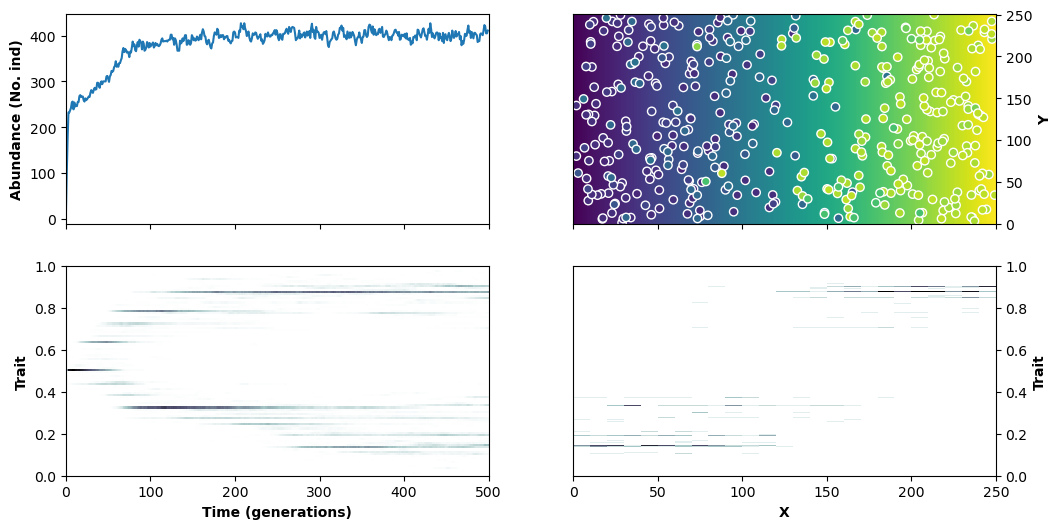

In [4]:
ext.plot_temp_dyn_1trait(df1, environment, x)

Then we can transform our taxon_id and ancestor_id information into a [dendropy.Tree](https://dendropy.org/primer/trees.html) by using our custoum-made pandas accessor **ptree** and the method **to_dendropy_tree**. 

In [5]:
tree1 = df1.ptree.to_dendropy_tree()

One ca visulize this tree using the dendropy's [print_plot](https://dendropy.org/primer/trees.html?highlight=print_plot#viewing-and-displaying-trees) method or [toytree's](https://toytree.readthedocs.io/en/latest/Cookbook.html#6.-Plot-histograms-associated-with-tip-trait-values-(ridge-plot), which we have coded into the function **toytree_plot**.

In [6]:
tree1.print_plot()

                                                    ++++++++++++++++++++++ 1186
 ++++++++++++++++++++++++++++++++++++++++++++++++++++                          
 |                                                  ++++++++++++++++++++++ 1187
++                                                                             
 |                            ++++++++++++++++++++++++++++++++++++++++++++ 1188
 ++++++++++++++++++++++++++++++                                                
                              \----------------------------------+++++++++ 566 
                                                                               
                                                                               


In [7]:
ext.toytree_plot(tree1, df1)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="400.0px" viewBox="0 0 300.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf7ae8317a02a44aa9f56bdc48c078fce"> <polygon points="200.0,200.0 201.53061224489795,200.0 203.0612244897959,200.0 204.59183673469389,200.0 206.12244897959187,200.0 207.6530612244898,200.0 209.18367346938774,200.0 210.71428571428572,200.0 212.24489795918367,200.0 213.77551020408163,200.0 215.30612244897958,200.0 216.83673469387753,200.0 218.36734693877548,200.0 219.8979591836735,200.0 221.42857142857144,200.0 222.9591836734694,200.0 224.48979591836735,200.0 226.0204081632653,200.0 227.55102040816325,200.0 229.0816326530612,200.0 230.61224489795916,200.0 232.1428571428571,200.0 233.6734693877551,200.0 235.20408163265304,200.0 236.73469387755102,200.0 238.26530612244898,200.0 239.79591836734693,200.0 241.3265306122449,200.0 242.85714285714286,200.0 244.3877551020408,200.0 245.91836734693877,200.0 247.44897959183675,200.0 248.9795918367347,200.0 250.51020408163265,200.0 252.0408163265306,200.0 253.57142857142858,200.0 255.10204081632654,200.0 256.6326530612245,200.0 258.16326530612247,200.0 259.6938775510204,200.0 261.2244897959184,200.0 262.7551020408163,200.0 264.2857142857143,200.0 265.81632653061223,200.0 267.3469387755102,200.0 268.8775510204082,200.0 270.4081632653061,200.0 271.9387755102041,200.0 273.469387755102,200.0 275.0,200.0 275.0,200.0 273.469387755102,200.0 271.9387755102041,200.0 270.4081632653061,200.0 268.8775510204082,200.0 267.3469387755102,200.0 265.81632653061223,200.0 264.2857142857143,200.0 262.7551020408163,200.0 261.2244897959184,200.0 259.6938775510204,200.0 258.16326530612247,200.0 256.6326530612245,200.0 255.10204081632654,200.0 253.57142857142858,200.0 252.0408163265306,200.0 250.51020408163265,200.0 248.9795918367347,200.0 247.44897959183675,200.0 245.91836734693877,199.99999999999997 244.3877551020408,199.9999999999925 242.85714285714286,199.99999999886154 241.3265306122449,199.99999989471655 239.79591836734693,199.99999406173254 238.26530612244898,199.99979565801556 236.73469387755102,199.9957062783988 235.20408163265304,199.94478183766 233.6734693877551,199.56279473704794 232.1428571428571,197.8364083568369 230.61224489795916,193.0688192371209 229.0816326530612,184.61935035395092 227.55102040816325,174.25585966955614 226.0204081632653,166.19659846201017 224.48979591836735,165.87541591117713 222.9591836734694,172.8223556681112 221.42857142857144,180.1675118208813 219.8979591836735,184.4875768794315 218.36734693877548,184.433425617728 216.83673469387753,176.10896267773117 215.30612244897958,159.54753062365666 213.77551020408163,138.7090617727572 212.24489795918367,116.45081276188535 210.71428571428572,106.25 209.18367346938774,124.41339738550802 207.6530612244898,159.0613333566068 206.12244897959187,185.1710791032543 204.59183673469389,196.31797267886003 203.0612244897959,199.35943312882034 201.53061224489795,199.9223620961228 200.0,199.99365089075852" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0;stroke-width:0.5"> 1188 <polygon points="200.0,275.0 201.53061224489795,275.0 203.0612244897959,275.0 204.59183673469389,275.0 206.12244897959187,275.0 207.6530612244898,275.0 209.18367346938774,275.0 210.71428571428572,275.0 212.24489795918367,275.0 213.77551020408163,275.0 215.30612244897958,275.0 216.83673469387753,275.0 218.36734693877548,275.0 219.8979591836735,275.0 221.42857142857144,275.0 222.9591836734694,275.0 224.48979591836735,275.0 226.0204081632653,275.0 227.55102040816325,275.0 229.0816326530612,275.0 230.61224489795916,275.0 232

We can then genereate another model run, for example, with trait-mediated competition to compare the differences in lineages reconstruction.

In [8]:
df2 = ext.single_model_run(environment, x, y, sigma_u=0.20, K=30)

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    r: 50
    K: 30
    sigma_f: 0.2
    sigma_d: 30
    sigma_m: 0.05
    p_m: 0.005
    sigma_u: 0.2



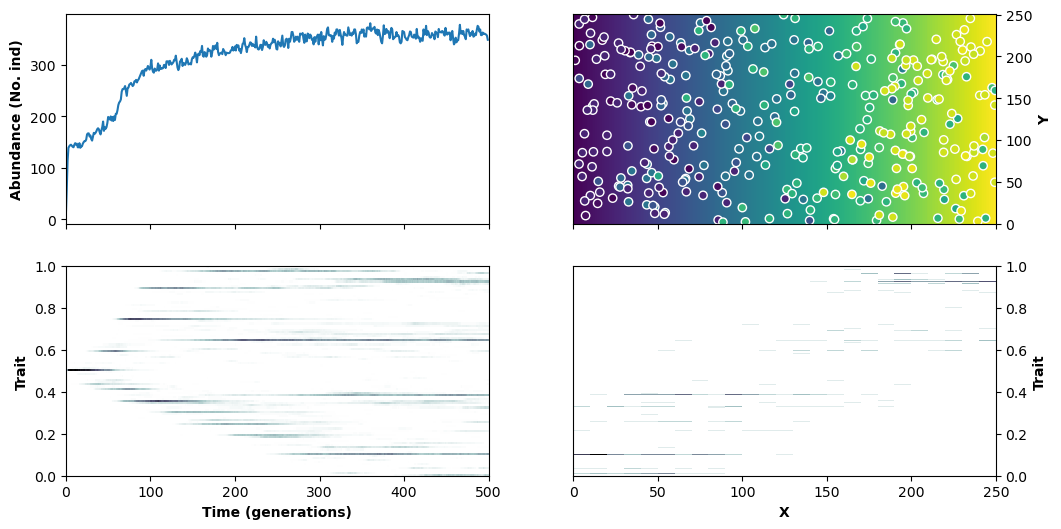

In [9]:
ext.plot_temp_dyn_1trait(df2, environment, x)

In [10]:
tree2 = df2.ptree.to_dendropy_tree()

In [11]:
tree2.print_plot()

                                                    ++++++++++++++++++++++ 2406
                                                    |                          
                                                /++++                    + 2407
                                                |   |              +++++++     
                                                |   ++++++++++++++++     + 2408
        +++++++++++++++++++++++++++++++++++++++++                  |           
        |                                       |                  +++++++ 2409
        +                                       |                              
        |                                       \-------------------++++++ 1569
        |                                                                      
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2410
        |                                                                      
        |        +++++++++++++++++++++++

In [12]:
ext.toytree_plot(tree2, df2)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="400.0px" viewBox="0 0 300.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te82467da32d84eb8bd4df0e23efcfda7"> <polygon points="200.0,116.66666666666666 201.53061224489795,116.66666666666666 203.0612244897959,116.66666666666666 204.59183673469389,116.66666666666666 206.12244897959187,116.66666666666666 207.6530612244898,116.66666666666666 209.18367346938774,116.66666666666666 210.71428571428572,116.66666666666666 212.24489795918367,116.66666666666666 213.77551020408163,116.66666666666666 215.30612244897958,116.66666666666666 216.83673469387753,116.66666666666666 218.36734693877548,116.66666666666666 219.8979591836735,116.66666666666666 221.42857142857144,116.66666666666666 222.9591836734694,116.66666666666666 224.48979591836735,116.66666666666666 226.0204081632653,116.66666666666666 227.55102040816325,116.66666666666666 229.0816326530612,116.66666666666666 230.61224489795916,116.66666666666666 232.1428571428571,116.66666666666666 233.6734693877551,116.66666666666666 235.20408163265304,116.66666666666666 236.73469387755102,116.66666666666666 238.26530612244898,116.66666666666666 239.79591836734693,116.66666666666666 241.3265306122449,116.66666666666666 242.85714285714286,116.66666666666666 244.3877551020408,116.66666666666666 245.91836734693877,116.66666666666666 247.44897959183675,116.66666666666666 248.9795918367347,116.66666666666666 250.51020408163265,116.66666666666666 252.0408163265306,116.66666666666666 253.57142857142858,116.66666666666666 255.10204081632654,116.66666666666666 256.6326530612245,116.66666666666666 258.16326530612247,116.66666666666666 259.6938775510204,116.66666666666666 261.2244897959184,116.66666666666666 262.7551020408163,116.66666666666666 264.2857142857143,116.66666666666666 265.81632653061223,116.66666666666666 267.3469387755102,116.66666666666666 268.8775510204082,116.66666666666666 270.4081632653061,116.66666666666666 271.9387755102041,116.66666666666666 273.469387755102,116.66666666666666 275.0,116.66666666666666 275.0,116.28631048150405 273.469387755102,109.62761321175259 271.9387755102041,97.27727202310993 270.4081632653061,82.2006107190606 268.8775510204082,75.0 267.3469387755102,111.52402429752783 265.81632653061223,110.32369376124272 264.2857142857143,114.96565962962033 262.7551020408163,116.62187094414017 261.2244897959184,116.08620161032078 259.6938775510204,115.70162878936664 258.16326530612247,116.59358053086012 256.6326530612245,116.66641453392864 255.10204081632654,116.66666662704553 253.57142857142858,116.66666666666637 252.0408163265306,116.66666666666666 250.51020408163265,116.66666666666666 248.9795918367347,116.66666666666666 247.44897959183675,116.66666666666666 245.91836734693877,116.66666666666666 244.3877551020408,116.66666666666666 242.85714285714286,116.66666666666666 241.3265306122449,116.66666666666666 239.79591836734693,116.66666666666666 238.26530612244898,116.66666666666666 236.73469387755102,116.66666666666666 235.20408163265304,116.66666666666666 233.6734693877551,116.66666666666666 232.1428571428571,116.66666666666666 230.61224489795916,116.66666666666666 229.0816326530612,116.66666666666666 227.55102040816325,116.66666666666666 226.0204081632653,116.66666666666666 224.48979591836735,116.66666666666666 222.9591836734694,116.66666666666666 221.42857142857144,116.66666666666666 219.8979591836735,116.66666666666666 218.36734693877548,116.66666666666666 216.83673469387753,116.66666666666666 215.30612244897958,116.666666666

## Tree summary statistics 

[Dendropy](https://dendropy.org/primer/index.html) also offer a suite of methods to compute metrics of phylogenetic trees, which can be use to compare results between model runs. As well as method to manipulate the trees and export them to different formats. For example below we will compute common metrics of phylogenetic diversity from the above trees to compare them,

### Phylogenetic diversity (PD)

In [13]:
sum(tree1.calc_node_root_distances())

1758.0

In [14]:
sum(tree2.calc_node_root_distances())

4359.0

### Mean pairwise distance (MPD)

In [15]:
pdm1=tree1.phylogenetic_distance_matrix()

In [16]:
pdm1.mean_pairwise_distance()

676.6666666666666

In [17]:
pdm2=tree2.phylogenetic_distance_matrix()

In [18]:
pdm2.mean_pairwise_distance()

670.6111111111111

### Mean neighbor taxon distance (MNTD)

In [19]:
pdm1.mean_nearest_taxon_distance()

320.0

In [20]:
pdm2.mean_nearest_taxon_distance()

392.22222222222223

### Lineages through time (LTT)

In [21]:
time_steps1 = np.linspace(0, tree1.max_distance_from_root(), 50)
ltt1=[tree1.num_lineages_at(t) for t in time_steps1]
time_steps2 = np.linspace(0, tree2.max_distance_from_root(), 50)
ltt2 = [tree2.num_lineages_at(t) for t in time_steps2]

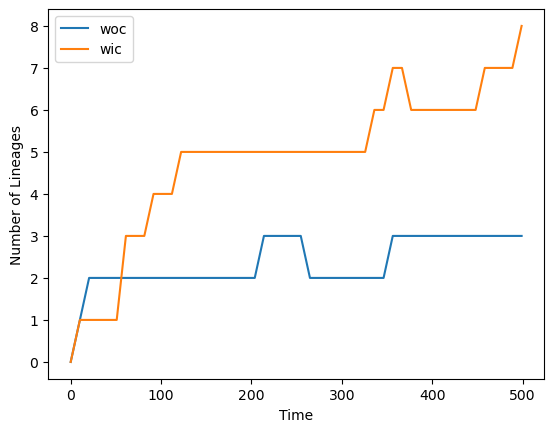

In [22]:
plt.plot(time_steps1, ltt1, label='woc')
plt.plot(time_steps2, ltt2, label='wic')
plt.xlabel('Time')
plt.ylabel('Number of Lineages')
plt.legend()